# Processing the compiled data from the API

In this notebook, we process the data obtained from the API, resulting in a dataframe that can be used for further analysis.

The compiled data is stored in the `data/compiled` folder.

The processed data is then stored in the `data/processed` folder.

The module `data_processing` contains the functions used to process the data.

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from nlp_assemblee.data_processing import DataProcessing

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
processor15 = DataProcessing(
    deputies_df_path="../../data/compiled/15th_deputies.pkl",
    compiled_data_path="../../data/compiled/15th_legislature_complete.tsv",
    # process=False,
    # save=False
    process=True,
    save="../../data/processed",
    legislature=15,
)

Cleaning the deputies dataframe...
Cleaning the compiled dataset...
Merging the two dataframes...
Saving the processed data...


In [14]:
processor14 = DataProcessing(
    deputies_df_path="../../data/compiled/14th_deputies.pkl",
    compiled_data_path="../../data/compiled/14th_legislature_complete.tsv",
    # process=False,
    # save=False,
    process=True,
    save="../../data/processed",
    legislature=14,
)

Cleaning the deputies dataframe...
Cleaning the compiled dataset...
Merging the two dataframes...
Saving the processed data...


## Exploring the deputies dataframe

In [17]:
processor14.deputies_df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    648 non-null    int64 
 1   nom                   648 non-null    object
 2   nom_de_famille        648 non-null    object
 3   prenom                648 non-null    object
 4   sexe                  648 non-null    object
 5   date_naissance        648 non-null    object
 6   lieu_naissance        645 non-null    object
 7   num_deptmt            648 non-null    object
 8   nom_circo             648 non-null    object
 9   num_circo             648 non-null    int64 
 10  mandat_debut          648 non-null    object
 11  mandat_fin            648 non-null    object
 12  ancien_depute         648 non-null    int64 
 13  groupe_sigle          648 non-null    object
 14  parti_ratt_financier  648 non-null    object
 15  anciens_mandats       648 non-null    ob

In [47]:
processor14.deputies_df_processed.head()

,id,nom,nom_de_famille,prenom,sexe,date_naissance,lieu_naissance,num_deptmt,nom_circo,num_circo,...,mandat_fin,ancien_depute,groupe_sigle,parti_ratt_financier,anciens_mandats,profession,place_en_hemicycle,slug,nb_mandats,legislature
0,1,Jean-François Lamour,Lamour,Jean-François,H,1956-02-02,Paris (Paris),75,Paris,13,...,2017-06-20,1,LR,Les Républicains,[{'mandat': '20/06/2007 / 19/06/2012 / fin de ...,Kinésithérapeute,80,jean-francois-lamour,2,2012-2017
1,2,Jean-Michel Clément,Clément,Jean-Michel,H,1954-10-31,Mauprevoir (Vienne),86,Vienne,3,...,2017-06-20,1,SER,Parti socialiste,[{'mandat': '20/06/2007 / 19/06/2012 / fin de ...,Avocat,263,jean-michel-clement,2,2012-2017
2,3,Bernard Reynès,Reynès,Bernard,H,1953-10-18,Meknès (Maroc),13,Bouches-du-Rhône,15,...,2017-06-20,1,LR,Les Républicains,[{'mandat': '20/06/2007 / 19/06/2012 / fin de ...,Chirurgien-Dentiste,190,bernard-reynes,2,2012-2017
3,4,Sandrine Hurel,Hurel,Sandrine,F,1968-08-07,Lisieux (Calvados),76,Seine-Maritime,6,...,2015-08-27,1,,Parti socialiste,[{'mandat': '20/06/2007 / 19/06/2012 / fin de ...,Secrétaire de direction,460,sandrine-hurel,2,2012-2017
4,5,Marc Laffineur,Laffineur,Marc,H,1945-08-10,Maubeuge (Nord),49,Maine-et-Loire,7,...,2017-06-20,1,LR,Les Républicains,"[{'mandat': '20/06/2012 / / '}, {'mandat': '0...",Médecin anesthésiste-réanimateur,183,marc-laffineur,2,2012-2017


In [51]:
ddf = processor14.deputies_df_processed.copy()
ddf["date_naissance"] = pd.to_datetime(ddf["date_naissance"])

In [105]:
colors = sns.color_palette("pastel", as_cmap=True)

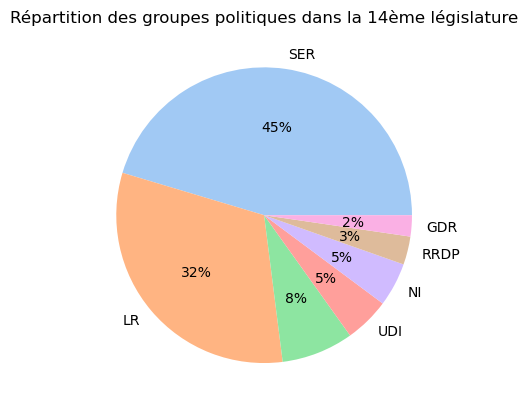

In [106]:
ax = ddf["groupe_sigle"].value_counts().plot.pie(colors=colors, autopct="%0.0f%%")
ax.set(ylabel="", title="Répartition des groupes politiques dans la 14ème législature");

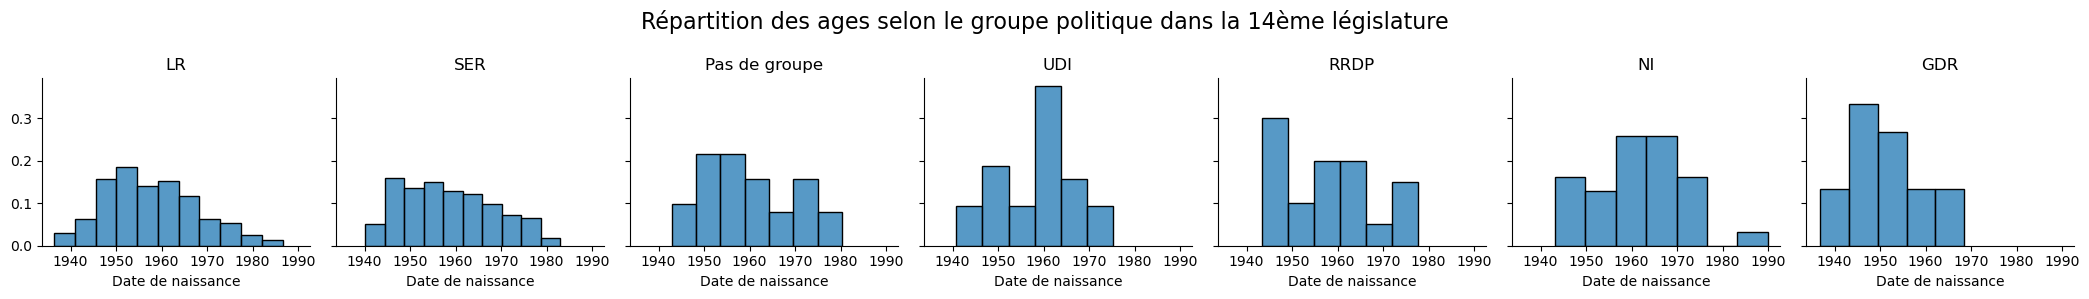

In [118]:
title = "Répartition des ages selon le groupe politique dans la 14ème législature"
g = sns.FacetGrid(ddf, col="groupe_sigle", margin_titles=True)
g.map(sns.histplot, "date_naissance", stat="probability")
g.set_axis_labels("Date de naissance", "")
g.figure.suptitle(title, fontsize=16)
for group in g.axes_dict:
    subtitle = group if group != "" else "Pas de groupe"
    g.axes_dict[group].set_title(subtitle)
g.figure.tight_layout()

## Exploring the processed compiled dataframe

In [44]:
processor14.compiled_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458418 entries, 0 to 458417
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  458418 non-null  int64 
 1   seance_id           458418 non-null  int64 
 2   date                458418 non-null  object
 3   moment              458418 non-null  object
 4   type                458418 non-null  object
 5   titre_complet       458418 non-null  object
 6   titre               458418 non-null  object
 7   timestamp           458418 non-null  int64 
 8   intervention        458418 non-null  object
 9   nb_mots             458418 non-null  int64 
 10  personnalite        0 non-null       object
 11  depute              458418 non-null  object
 12  parlementaire_sexe  458418 non-null  object
 13  depute_groupe       458418 non-null  object
 14  fonction            83914 non-null   object
 15  source              458418 non-null  object
 16  in

In [45]:
processor14.compiled_data_processed.head()

,id,seance_id,date,moment,type,titre_complet,titre,timestamp,intervention,nb_mots,personnalite,depute,parlementaire_sexe,depute_groupe,fonction,source,intervention_count,nb_mots_approx
0,125,11,2012-07-03,15:00,loi,déclaration de politique générale du gouvernem...,déclaration de politique générale du gouvernem...,190,"Alors, arrêtez de dépenser !",8,NaN,Pierre Lellouche,H,UMP,NaN,http://www.assemblee-nationale.fr/14/cri/2011-...,1562,5
1,531,22,2012-07-04,15:00,loi,rappels au règlement,rappels au règlement,160,Commencez par respecter l'opposition ! (Protes...,16,NaN,Pierre Lellouche,H,UMP,NaN,http://www.assemblee-nationale.fr/14/cri/2011-...,1562,16
2,568,22,2012-07-04,15:00,loi,débat sur les résultats du conseil européen de...,débat sur les résultats du conseil européen de...,530,Apprenez à respecter le Parlement ! Où vous cr...,9,NaN,Pierre Lellouche,H,UMP,NaN,http://www.assemblee-nationale.fr/14/cri/2011-...,1562,10
3,827,22,2012-07-04,15:00,loi,débat sur les résultats du conseil européen de...,débat sur les résultats du conseil européen de...,3120,"Madame la présidente, monsieur le ministre, me...",186,NaN,Pierre Lellouche,H,UMP,NaN,http://www.assemblee-nationale.fr/14/cri/2011-...,1562,181
4,829,22,2012-07-04,15:00,loi,débat sur les résultats du conseil européen de...,débat sur les résultats du conseil européen de...,3140,"Bien sûr, les impôts vont à nouveau pleuvoir c...",64,NaN,Pierre Lellouche,H,UMP,NaN,http://www.assemblee-nationale.fr/14/cri/2011-...,1562,58


## Exploring the merged dataframe  

In [16]:
processor.processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9705 entries, 0 to 9704
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   seance_id       9705 non-null   int64         
 1   date_seance     9705 non-null   object        
 2   nom             9705 non-null   object        
 3   groupe          9705 non-null   object        
 4   titre           9705 non-null   object        
 5   titre_complet   9705 non-null   object        
 6   intervention    9705 non-null   object        
 7   date_naissance  9705 non-null   object        
 8   sexe            9705 non-null   object        
 9   profession      9705 non-null   object        
 10  nb_mandats      9705 non-null   int64         
 11  date            9705 non-null   datetime64[ns]
 12  year            9705 non-null   int64         
 13  month           9705 non-null   int64         
 14  day             9705 non-null   int64         
 15  y_na

In [6]:
processor.processed_data.head()

,seance_id,date_seance,nom,groupe,titre,titre_complet,intervention,date_naissance,sexe,profession,...,year,month,day,y_naissance,n_y_naissance,n_year,cos_month,sin_month,cos_day,sin_day
0,40,2012-07-11,Alain Tourret,RRDP,maternitÃ© de vire,questions au gouvernement > maternitÃ© de vire,Ma question s'adresse Ã Mme la ministre des a...,1947-12-25,H,Avocat,...,2012,7,11,1947,0.914634,0.0,-8.660254e-01,-0.500000,-0.612106,0.790776
1,326,2012-10-24,Alain Tourret,RRDP,question palestinienne,questions au gouvernement > question palestini...,Ma question s'adresse Ã M. le ministre des af...,1947-12-25,H,Avocat,...,2012,10,24,1947,0.914634,0.0,5.000000e-01,-0.866025,0.151428,-0.988468
2,577,2012-11-28,Alain Tourret,RRDP,rÃ©forme du statut du chef de l'Ãtat,questions au gouvernement > rÃ©forme du statut...,"Monsieur le prÃ©sident, monsieur le Premier mi...",1947-12-25,H,Avocat,...,2012,11,28,1947,0.914634,0.0,8.660254e-01,-0.500000,0.820763,-0.571268
3,1010,2013-03-12,Alain Tourret,RRDP,relations entre la france et l'algÃ©rie,questions au gouvernement > relations entre la...,"Permettez-moi tout d'abord, en tant que dÃ©put...",1947-12-25,H,Avocat,...,2013,3,12,1947,0.914634,0.2,6.123234e-17,1.000000,-0.758758,0.651372
4,1205,2013-04-16,Alain Tourret,RRDP,politique franÃ§aise pour la promotion des dro...,questions au gouvernement > politique franÃ§ai...,"Monsieur le prÃ©sident, avant de poser ma ques...",1947-12-25,H,Avocat,...,2013,4,16,1947,0.914634,0.2,-5.000000e-01,0.866025,-0.994869,-0.101168


In [62]:
processor.processed_data.loc[24, "intervention"]

'Monsieur le Premier ministre, le Royaume-Uni n\x92a que tardivement rejoint l\x92Europe, en 1973, alors que l\x92Europe des pères fondateurs \x96 dont Maurice Faure \x96 a été créée en 1958. Le Royaume-Uni s\x92est toujours comporté de manière indépendante, représentant en réalité les intérêts américains, ceux des États-Unis d\x92Amérique. Le Royaume-Uni a toujours préféré, dans ces termes marins qui lui sont chers, le tangage à l\x92arrimage. Chacun se rappelle les foucades de Madame Thatcher, qui lui ont permis d\x92obtenir un statut privilégié et un chèque spécifique.Lorsqu\x92il a fallu créer l\x92euro, principal outil de stabilisation monétaire et de lutte contre l\x92inflation,\x85 \x85le Royaume-Uni a préféré choisir la livre, car, en Grande-Bretagne, le pouvoir n\x92est pas aux Communes, mais à la City.Aujourd\x92hui, M. Cameron, digne héritier de Mme Thatcher, reprend sa politique de chantage. Certes, vous avez rappelé les nouveaux défis qui nous opposent peu ou prou à la Gra